In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_empleados =  pd.read_csv("recursos_humanos.csv")
df_empleados.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Se revisan los departamentos que hay en la columna de ventas.

In [3]:
df_empleados.value_counts("sales")

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

Se coniverten los datos por departamento a binario, y se revisa la informacion de los datos.

In [4]:
df_empleados_dummy = pd.get_dummies(df_empleados)
df_empleados_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_IT               14999 non-null  bool   
 9   sales_RandD            14999 non-null  bool   
 10  sales_accounting       14999 non-null  bool   
 11  sales_hr               14999 non-null  bool   
 12  sales_management       14999 non-null  bool   
 13  sales_marketing        14999 non-null  bool   
 14  sales_product_mng      14999 non-null  bool   
 15  sa

In [5]:
df_empleados_dummy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


Se selecciona desde la columna 8 a la ultima y se aplica el cambio a 1 si es del departamento y a 0 si no es del departamento.

In [6]:
for columna in df_empleados_dummy.iloc[:, 8:]:
    df_empleados_dummy[columna] = df_empleados_dummy[columna].apply(lambda x: 1 if x else 0)

df_empleados_dummy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Creamos las variables x(independiente) y y(dependiente)

In [7]:
VariableIndependiente = df_empleados_dummy.drop(["left"], axis=1)
VariableDependiente = df_empleados_dummy["left"]
VariableDependiente.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [8]:
VariableIndependiente.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Despues de importar el modelo SVM se procede a partir los datos en entrenamiento, test y normalizarlos con la herramienta de StandardScaler() 

El uso de fit_transform en x_train permite que el scaler "aprenda" de los datos de entrenamiento. Esto significa que calcula la media y la desviación estándar únicamente a partir de X_train.

Luego, transforma x_train utilizando esos parámetros. Esto asegura que el modelo entrena sobre datos que han sido escalados adecuadamente sin usar información futura.

Cuando usas transform en x_test, aplicas la misma transformación a los datos de prueba utilizando los parámetros (media y desviación estándar) calculados a partir de X_train.

Esto asegura que el modelo evaluará los datos de prueba de la misma manera que fue entrenado, sin tener acceso a información del conjunto de prueba durante el entrenamiento. Esto es crucial para evitar la fuga de datos.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(VariableIndependiente, VariableDependiente, test_size=0.2, random_state=1)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_test[:1])

[[ 0.22795339 -1.901743   -1.45439793  0.11956725  2.40131103 -0.41072597
  -0.14676255 -0.30152505 -0.23500683 -0.23103132 -0.22598379 -0.21090566
  -0.24719867 -0.25078493  1.61481788 -0.41831831 -0.46788361 -0.29756031
  -0.97164932  1.14423615]]


Efectivamente son 20 datos de las 20 columnas en el entrenamiento

In [14]:
# Definir el rango de parámetros para cada kernel
parametros = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10, 100],
        'degree': [2, 3, 4],
        'coef0': [0, 0.5, 1]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001]
    },
    {
        'kernel': ['sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'coef0': [0, 0.5, 1]
    }
]

svm = SVC()

# Realizar la búsqueda de hiperparámetros
grid = GridSearchCV(svm, parametros, refit=True, verbose=2, cv=3)
grid.fit(x_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros: ", grid.best_params_)
print("Mejor puntuación: ", grid.best_score_)

Fitting 3 folds for each of 104 candidates, totalling 312 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   1.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.0s
[CV] END .................................C=1, kernel=linear; total time=   1.4s
[CV] END .................................C=1, kernel=linear; total time=   1.5s
[CV] END .................................C=1, kernel=linear; total time=   1.5s
[CV] END ................................C=10, kernel=linear; total time=   3.7s
[CV] END ................................C=10, kernel=linear; total time=   4.0s
[CV] END ................................C=10, kernel=linear; total time=   3.9s
[CV] END ...............................C=100, kernel=linear; total time=  19.8s
[CV] END ...............................C=100, kernel=linear; total time=  22.7s
[CV] END ...............................C=100,

In [49]:
resultados = pd.DataFrame(grid.cv_results_)
resultados['params_str'] = resultados['params'].astype(str)

# Agrega una columna para el kernel
resultados['kernel'] = resultados['params'].apply(lambda x: x['kernel'] if 'kernel' in x else None)

# Agrupa por kernel y obtiene la fila con el puntaje más alto para cada grupo
max_scores = resultados.loc[resultados.groupby('kernel')['mean_test_score'].idxmax()]

# Ordena los resultados por puntaje descendente
max_scores = max_scores.sort_values(by='mean_test_score', ascending=False)

# Selecciona las columnas de interés
max_scores = max_scores[['mean_test_score', 'params', 'kernel', 'mean_score_time']]

# Imprime cada kernel con sus parámetros y puntaje
for index, row in max_scores.iterrows():
    print(f"Kernel: {row['kernel']} \nMean Test Score: {row['mean_test_score']} \nParams: {row['params']} \nMean Score Time: {row['mean_score_time']} \n")


Kernel: rbf 
Mean Test Score: 0.9709140201717096 
Params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'} 
Mean Score Time: 0.7380905946095785 

Kernel: poly 
Mean Test Score: 0.95866304076019 
Params: {'C': 100, 'coef0': 0.5, 'degree': 4, 'kernel': 'poly'} 
Mean Score Time: 0.060414632161458336 

Kernel: sigmoid 
Mean Test Score: 0.7823982453946821 
Params: {'C': 10, 'coef0': 0, 'gamma': 0.001, 'kernel': 'sigmoid'} 
Mean Score Time: 0.39320214589436847 

Kernel: linear 
Mean Test Score: 0.7764813286654997 
Params: {'C': 0.1, 'kernel': 'linear'} 
Mean Score Time: 0.2490553061167399 



Aqui podemos observar que se encontraron los mejores valores de cada kernel y aunque el mejor sea el que mas tarda, tambien se puede optar por el poly ya que su promedio de tiempo es muy bajo en procesamiento.

In [27]:
resultados['kernel'].value_counts()

kernel
sigmoid    48
poly       36
rbf        16
linear      4
Name: count, dtype: int64

Aqui podemos ver las diferentes combinaciones, todas estas se hicieron 3 veces por la validacion cruzada, con los diferentes parametros, como podemos observar la sigmoid fue la que mas iteraciones tuvo por los parametros que tiene. 

Evaluando con los parámetros: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


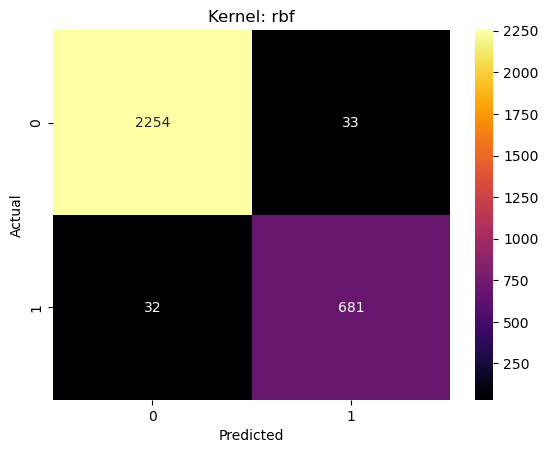

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2287
           1       0.95      0.96      0.95       713

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000

Evaluando con los parámetros: {'C': 100, 'coef0': 0.5, 'degree': 4, 'kernel': 'poly'}


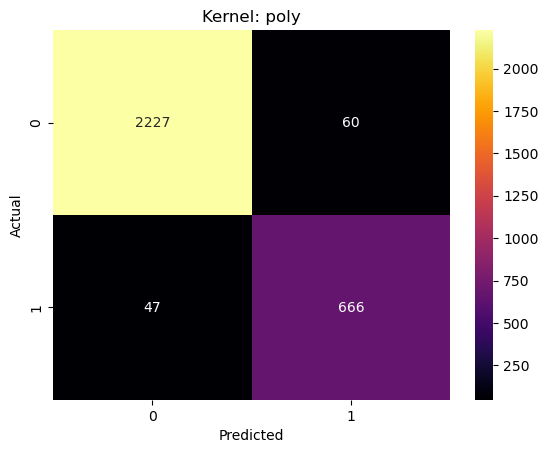

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2287
           1       0.92      0.93      0.93       713

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000

Evaluando con los parámetros: {'C': 10, 'coef0': 0, 'gamma': 0.001, 'kernel': 'sigmoid'}


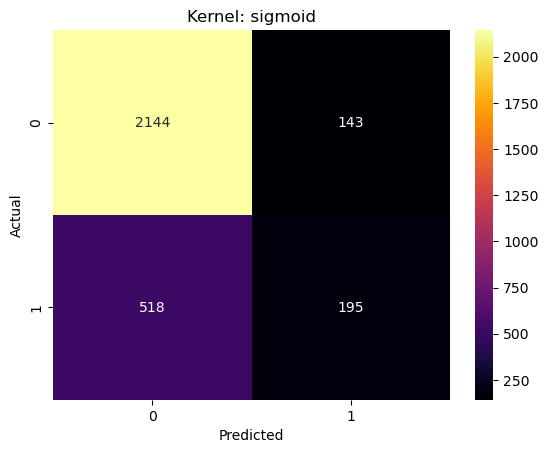

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2287
           1       0.58      0.27      0.37       713

    accuracy                           0.78      3000
   macro avg       0.69      0.61      0.62      3000
weighted avg       0.75      0.78      0.75      3000

Evaluando con los parámetros: {'C': 0.1, 'kernel': 'linear'}


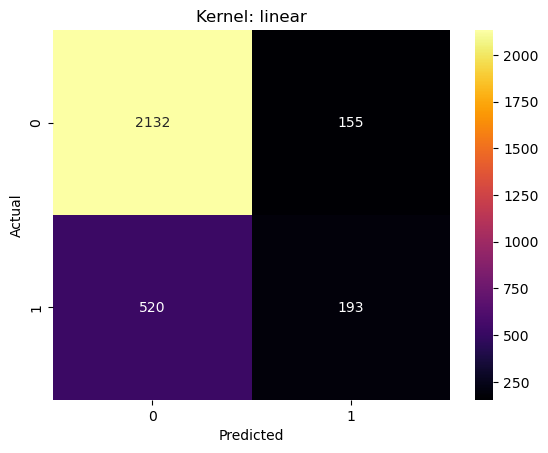

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2287
           1       0.55      0.27      0.36       713

    accuracy                           0.78      3000
   macro avg       0.68      0.60      0.61      3000
weighted avg       0.74      0.78      0.74      3000



In [53]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns


ModelosParametros = [
    {'C': 10, 'gamma': 1, 'kernel': 'rbf'},
    {'C': 100, 'coef0': 0.5, 'degree': 4, 'kernel': 'poly'},
    {'C': 10, 'coef0': 0, 'gamma': 0.001, 'kernel': 'sigmoid'},
    {'C': 0.1, 'kernel': 'linear'}
]

def evaluate_model(params):
    # Crear el clasificador con los parámetros dados
    clf = SVC(**params)
    clf.fit(x_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = clf.predict(x_test)
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Mostrar la matriz de confusión utilizando seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')
    plt.xlabel('Predecidos')
    plt.ylabel('Actuales')
    plt.title(f'Kernel: {params["kernel"]}')
    plt.show()
    
    # Mostrar reporte de clasificación
    print(classification_report(y_test, y_pred))

# Evaluar y mostrar resultados para cada conjunto de parámetros
for params in ModelosParametros:
    print(f"Evaluando con los parámetros: {params}")
    evaluate_model(params)


Se obtiene la precision del modelo para saber si los empleados se retiran de la empresa, dando un 98% de precision con rbf (radial basis function)

96% poly de grado 4 con coef 0.5 y C de 100

78% sigmoid con gama 0.001, coef 0 y C de 10

y finalmente con 78% linear con C de 0.1

Definitivamente los ultimos dos modelos, no son muy utiles en comparacion de los dos primeros.

Evaluando con los parámetros: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


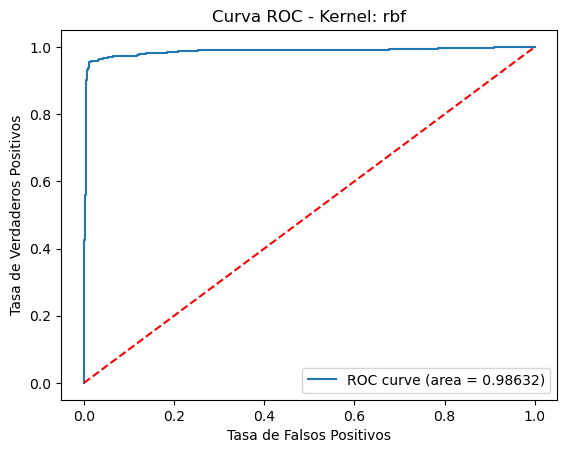

Evaluando con los parámetros: {'C': 100, 'coef0': 0.5, 'degree': 4, 'kernel': 'poly'}


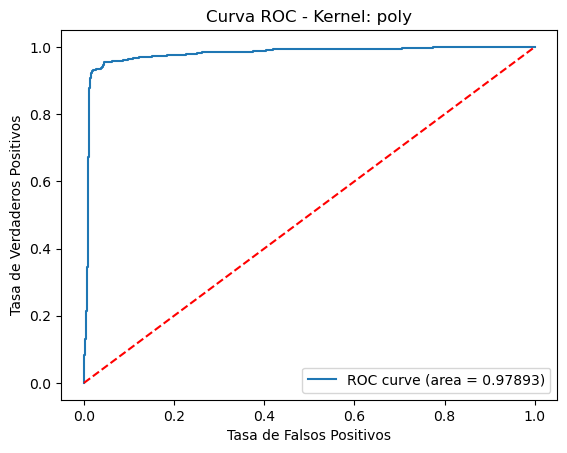

Evaluando con los parámetros: {'C': 10, 'coef0': 0, 'gamma': 0.001, 'kernel': 'sigmoid'}


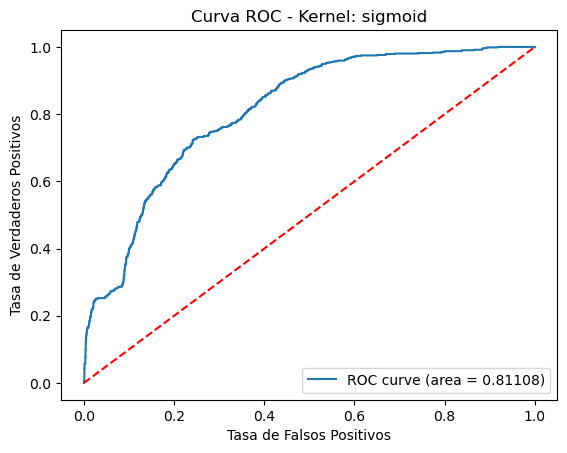

Evaluando con los parámetros: {'C': 0.1, 'kernel': 'linear'}


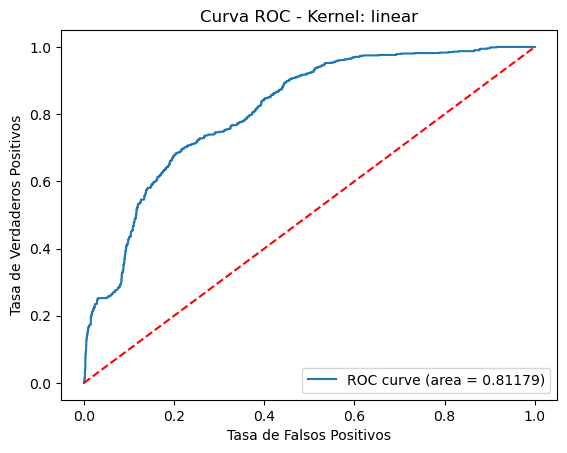

In [59]:
ModelosParametrosCurva = [
    {'C': 10, 'gamma': 1, 'kernel': 'rbf'},
    {'C': 100, 'coef0': 0.5, 'degree': 4, 'kernel': 'poly'},
    {'C': 10, 'coef0': 0, 'gamma': 0.001, 'kernel': 'sigmoid'},
    {'C': 0.1, 'kernel': 'linear'}
]

def curva_roc(params):

    # Crear el clasificador con los parámetros dados
    clf = SVC(**params, probability=True)
    clf.fit(x_train, y_train)
    
    # Obtener las probabilidades de predicción para la clase positiva
    y_pred_proba = clf.predict_proba(x_test)[:, 1]

    
    # Calcular fpr, tpr y roc_auc
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Mostrar la curva ROC
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.5f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - Kernel: {params["kernel"]}')
    plt.legend(loc='lower right')
    plt.show()
    

for params in ModelosParametrosCurva:
    print(f"Evaluando con los parámetros: {params}")
    curva_roc(params)


Finalmente podemos observar con las curvas roc podemos ver que los ultimos dos modelos si estan muy sesgados.